In [1]:
pip install nltk matplotlib


In [2]:
import nltk
import matplotlib.pyplot as plt
from collections import Counter
import string

In [3]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
# Function to load Bangla text from a file
def load_human_written_text(file_path):
    with open('/content/human_written.txt', 'r', encoding='utf-8') as file:
        return file.read()

# Path to the text file
file_path = '/content/human_written.txt'

# Load the text from the file and store it in the 'text' variable
human_written_text = load_human_written_text(file_path)

# Print the text to verify
print(human_written_text)

 ঘোবারক ভাঙন গাণ্ি খে ঝা

মোবারক হোসেন ভাত খেতে বসে তরকারির বাটির দিকে তাকিয়ে বললেন, এটা কী?
তাঁর গলার স্বরে অদূরবর্তী ঝড়ের আভাস। মনে হচ্ছে ভয়ঙ্কর কিছু হয়ে যাবে।

মনোয়ারা অদূরবর্তী ঝড়ের সম্ভাবনা সম্পূর্ণ অগ্রাহ্য করে স্বাভাবিক গলায় বললেন, কী
হয়েছে?

এটা কিসের তরকারি?

কৈ মাছের ঝোল।

কৈ মাছের ঝোলে তরকারি কী?

চোখে দেখতে পাচ্ছ না কী দিয়েছি! ফুলকপি, সিম।

তোমাকে কতবার বলেছি-ফুলকপির সঙ্গে সিম দেবে না। ফুলকপির এক স্বাদ, সিমের
আলাদা স্বাদ। আমার তো দুটা জিভ না যে একটায় সিম খাব আর অন্যটায় ফুলকপি?

মনোয়ারা হাই তুলতে তুলতে বললেন, যে তরকারি খেতে ইচ্ছা করে সেটা নিয়ে খেলেই
হয়। খেতে বসে খামাখা চিৎকার করছ কেন?

এই তরকারি তো আমি মরে গেলেও খাব না।


না খেলে না খেয়ো। ডাল আছে ডাল খাও।
শুধু ডাল দিয়ে ভাত খাব?
মনোয়ারা তীক্ষু গলায় বললেন, এটা তো হোটেল না যে চৌদ্দ পদের রান্না আছে।

মোবারক হোসেনের প্রচণ্ড ইচ্ছা হচ্ছে তরকারির বাটি ছুড়ে মেঝেয় ফেলে দিতে। এই
কাজটা করতে পারলে রাগটা ভালো দেখানো হয়। এতটা বাড়াবাড়ি করতে সাহসে কুলাচ্ছে
না। মনোয়ারা সহজ পাত্রী না। তার চীনামাটির বাটি ভাঙবে আর সে চুপ 

In [29]:
def bangla_sentence_tokenize(human_written_text):
    # Split sentences by full stop (।) used in Bangla
    sentences = human_written_text.split('।')
    sentences = human_written_text.split('\n\n')
    sentences = human_written_text.split('\n')
    return [sentence.strip() for sentence in sentences if sentence.strip()]

In [30]:
def bangla_word_tokenize(human_written_text):
    # Split words by spaces
    words = human_written_text.split()
    return [word.strip() for word in words if word.strip()]

In [31]:
def preprocess_text(human_written_text):
    # Remove punctuation (you might want to keep Bangla-specific punctuation like "।")
    translator = str.maketrans('', '', string.punctuation)
    human_written_text = human_written_text.translate(translator)

    # Tokenize sentences using the custom function
    sentences = bangla_sentence_tokenize(human_written_text)

    # Tokenize words using the custom function
    words = bangla_word_tokenize(human_written_text)

    return words, sentences

In [32]:
words, sentences = preprocess_text(human_written_text)
print(words)
print(sentences)

['ঘোবারক', 'ভাঙন', 'গাণ্ি', 'খে', 'ঝা', 'মোবারক', 'হোসেন', 'ভাত', 'খেতে', 'বসে', 'তরকারির', 'বাটির', 'দিকে', 'তাকিয়ে', 'বললেন', 'এটা', 'কী', 'তাঁর', 'গলার', 'স্বরে', 'অদূরবর্তী', 'ঝড়ের', 'আভাস।', 'মনে', 'হচ্ছে', 'ভয়ঙ্কর', 'কিছু', 'হয়ে', 'যাবে।', 'মনোয়ারা', 'অদূরবর্তী', 'ঝড়ের', 'সম্ভাবনা', 'সম্পূর্ণ', 'অগ্রাহ্য', 'করে', 'স্বাভাবিক', 'গলায়', 'বললেন', 'কী', 'হয়েছে', 'এটা', 'কিসের', 'তরকারি', 'কৈ', 'মাছের', 'ঝোল।', 'কৈ', 'মাছের', 'ঝোলে', 'তরকারি', 'কী', 'চোখে', 'দেখতে', 'পাচ্ছ', 'না', 'কী', 'দিয়েছি', 'ফুলকপি', 'সিম।', 'তোমাকে', 'কতবার', 'বলেছিফুলকপির', 'সঙ্গে', 'সিম', 'দেবে', 'না।', 'ফুলকপির', 'এক', 'স্বাদ', 'সিমের', 'আলাদা', 'স্বাদ।', 'আমার', 'তো', 'দুটা', 'জিভ', 'না', 'যে', 'একটায়', 'সিম', 'খাব', 'আর', 'অন্যটায়', 'ফুলকপি', 'মনোয়ারা', 'হাই', 'তুলতে', 'তুলতে', 'বললেন', 'যে', 'তরকারি', 'খেতে', 'ইচ্ছা', 'করে', 'সেটা', 'নিয়ে', 'খেলেই', 'হয়।', 'খেতে', 'বসে', 'খামাখা', 'চিৎকার', 'করছ', 'কেন', 'এই', 'তরকারি', 'তো', 'আমি', 'মরে', 'গেলেও', 'খাব', 'না।', 'না', 'খেলে', 'না', 'খেয়ো।', 

In [36]:
def word_frequency(words):
    return Counter(words)
print(words)

['ঘোবারক', 'ভাঙন', 'গাণ্ি', 'খে', 'ঝা', 'মোবারক', 'হোসেন', 'ভাত', 'খেতে', 'বসে', 'তরকারির', 'বাটির', 'দিকে', 'তাকিয়ে', 'বললেন', 'এটা', 'কী', 'তাঁর', 'গলার', 'স্বরে', 'অদূরবর্তী', 'ঝড়ের', 'আভাস।', 'মনে', 'হচ্ছে', 'ভয়ঙ্কর', 'কিছু', 'হয়ে', 'যাবে।', 'মনোয়ারা', 'অদূরবর্তী', 'ঝড়ের', 'সম্ভাবনা', 'সম্পূর্ণ', 'অগ্রাহ্য', 'করে', 'স্বাভাবিক', 'গলায়', 'বললেন', 'কী', 'হয়েছে', 'এটা', 'কিসের', 'তরকারি', 'কৈ', 'মাছের', 'ঝোল।', 'কৈ', 'মাছের', 'ঝোলে', 'তরকারি', 'কী', 'চোখে', 'দেখতে', 'পাচ্ছ', 'না', 'কী', 'দিয়েছি', 'ফুলকপি', 'সিম।', 'তোমাকে', 'কতবার', 'বলেছিফুলকপির', 'সঙ্গে', 'সিম', 'দেবে', 'না।', 'ফুলকপির', 'এক', 'স্বাদ', 'সিমের', 'আলাদা', 'স্বাদ।', 'আমার', 'তো', 'দুটা', 'জিভ', 'না', 'যে', 'একটায়', 'সিম', 'খাব', 'আর', 'অন্যটায়', 'ফুলকপি', 'মনোয়ারা', 'হাই', 'তুলতে', 'তুলতে', 'বললেন', 'যে', 'তরকারি', 'খেতে', 'ইচ্ছা', 'করে', 'সেটা', 'নিয়ে', 'খেলেই', 'হয়।', 'খেতে', 'বসে', 'খামাখা', 'চিৎকার', 'করছ', 'কেন', 'এই', 'তরকারি', 'তো', 'আমি', 'মরে', 'গেলেও', 'খাব', 'না।', 'না', 'খেলে', 'না', 'খেয়ো।', 

In [37]:
def plot_word_frequency(word_frequency):
    words, counts = zip(*word_frequency.most_common(20))  # Get top 10 words
    plt.bar(words, counts)
    plt.title('Top 20 Most Frequent Words')
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.xlabel('Words')
    plt.show()

In [39]:
word_frequency = word_frequency(words)

ঘোবারক: 1
ভাঙন: 1
গাণ্ি: 1
খে: 1
ঝা: 1
মোবারক: 51
হোসেন: 36
ভাত: 11
খেতে: 7
বসে: 9
তরকারির: 4
বাটির: 1
দিকে: 8
তাকিয়ে: 5
বললেন: 22
এটা: 12
কী: 15
তাঁর: 13
গলার: 1
স্বরে: 2
অদূরবর্তী: 2
ঝড়ের: 2
আভাস।: 1
মনে: 17
হচ্ছে: 9
ভয়ঙ্কর: 2
কিছু: 18
হয়ে: 13
যাবে।: 2
মনোয়ারা: 15
সম্ভাবনা: 1
সম্পূর্ণ: 1
অগ্রাহ্য: 1
করে: 38
স্বাভাবিক: 2
গলায়: 7
হয়েছে: 4
কিসের: 1
তরকারি: 6
কৈ: 6
মাছের: 7
ঝোল।: 1
ঝোলে: 1
চোখে: 13
দেখতে: 2
পাচ্ছ: 1
না: 43
দিয়েছি: 1
ফুলকপি: 6
সিম।: 1
তোমাকে: 2
কতবার: 1
বলেছিফুলকপির: 1
সঙ্গে: 10
সিম: 6
দেবে: 2
না।: 71
ফুলকপির: 2
এক: 5
স্বাদ: 1
সিমের: 1
আলাদা: 1
স্বাদ।: 1
আমার: 11
তো: 9
দুটা: 4
জিভ: 1
যে: 15
একটায়: 1
খাব: 3
আর: 18
অন্যটায়: 1
হাই: 1
তুলতে: 2
ইচ্ছা: 12
সেটা: 2
নিয়ে: 7
খেলেই: 3
হয়।: 10
খামাখা: 1
চিৎকার: 1
করছ: 1
কেন: 6
এই: 32
আমি: 22
মরে: 1
গেলেও: 2
খেলে: 1
খেয়ো।: 1
ডাল: 4
আছে: 11
খাও।: 1
শুধু: 6
দিয়ে: 16
তীক্ষু: 1
হোটেল: 1
চৌদ্দ: 1
পদের: 1
রান্না: 2
আছে।: 16
হোসেনের: 12
প্রচণ্ড: 3
বাটি: 5
ছুড়ে: 1
মেঝেয়: 1
ফেলে: 4
দিতে।: 1
কাজটা: 2
করতে: 7
পারলে: 1
রাগটা: 1
ভা

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2404 (\N{DEVANAGARI DANDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtoo

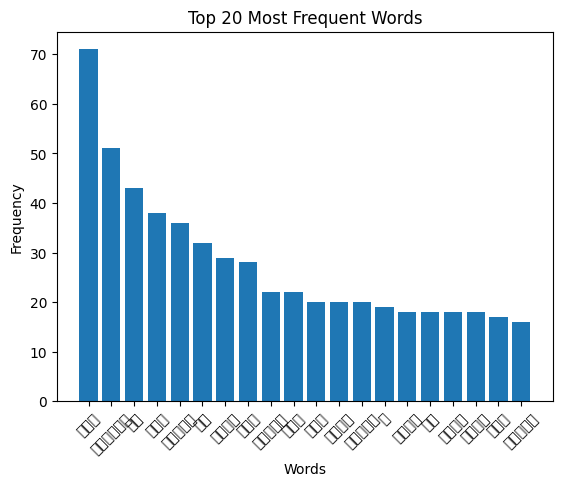

In [40]:
for word, count in word_frequency.items():
    print(f"{word}: {count}")

# Plot the word frequency
plot_word_frequency(word_frequency)

In [49]:
print(words)

['ঘোবারক', 'ভাঙন', 'গাণ্ি', 'খে', 'ঝা', 'মোবারক', 'হোসেন', 'ভাত', 'খেতে', 'বসে', 'তরকারির', 'বাটির', 'দিকে', 'তাকিয়ে', 'বললেন', 'এটা', 'কী', 'তাঁর', 'গলার', 'স্বরে', 'অদূরবর্তী', 'ঝড়ের', 'আভাস।', 'মনে', 'হচ্ছে', 'ভয়ঙ্কর', 'কিছু', 'হয়ে', 'যাবে।', 'মনোয়ারা', 'অদূরবর্তী', 'ঝড়ের', 'সম্ভাবনা', 'সম্পূর্ণ', 'অগ্রাহ্য', 'করে', 'স্বাভাবিক', 'গলায়', 'বললেন', 'কী', 'হয়েছে', 'এটা', 'কিসের', 'তরকারি', 'কৈ', 'মাছের', 'ঝোল।', 'কৈ', 'মাছের', 'ঝোলে', 'তরকারি', 'কী', 'চোখে', 'দেখতে', 'পাচ্ছ', 'না', 'কী', 'দিয়েছি', 'ফুলকপি', 'সিম।', 'তোমাকে', 'কতবার', 'বলেছিফুলকপির', 'সঙ্গে', 'সিম', 'দেবে', 'না।', 'ফুলকপির', 'এক', 'স্বাদ', 'সিমের', 'আলাদা', 'স্বাদ।', 'আমার', 'তো', 'দুটা', 'জিভ', 'না', 'যে', 'একটায়', 'সিম', 'খাব', 'আর', 'অন্যটায়', 'ফুলকপি', 'মনোয়ারা', 'হাই', 'তুলতে', 'তুলতে', 'বললেন', 'যে', 'তরকারি', 'খেতে', 'ইচ্ছা', 'করে', 'সেটা', 'নিয়ে', 'খেলেই', 'হয়।', 'খেতে', 'বসে', 'খামাখা', 'চিৎকার', 'করছ', 'কেন', 'এই', 'তরকারি', 'তো', 'আমি', 'মরে', 'গেলেও', 'খাব', 'না।', 'না', 'খেলে', 'না', 'খেয়ো।', 

In [46]:
def extract_ngrams(words, n):
    return zip(*[words[i:] for i in range(n)])

In [47]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx

In [54]:
print(words)

['ঘোবারক', 'ভাঙন', 'গাণ্ি', 'খে', 'ঝা', 'মোবারক', 'হোসেন', 'ভাত', 'খেতে', 'বসে', 'তরকারির', 'বাটির', 'দিকে', 'তাকিয়ে', 'বললেন', 'এটা', 'কী', 'তাঁর', 'গলার', 'স্বরে', 'অদূরবর্তী', 'ঝড়ের', 'আভাস।', 'মনে', 'হচ্ছে', 'ভয়ঙ্কর', 'কিছু', 'হয়ে', 'যাবে।', 'মনোয়ারা', 'অদূরবর্তী', 'ঝড়ের', 'সম্ভাবনা', 'সম্পূর্ণ', 'অগ্রাহ্য', 'করে', 'স্বাভাবিক', 'গলায়', 'বললেন', 'কী', 'হয়েছে', 'এটা', 'কিসের', 'তরকারি', 'কৈ', 'মাছের', 'ঝোল।', 'কৈ', 'মাছের', 'ঝোলে', 'তরকারি', 'কী', 'চোখে', 'দেখতে', 'পাচ্ছ', 'না', 'কী', 'দিয়েছি', 'ফুলকপি', 'সিম।', 'তোমাকে', 'কতবার', 'বলেছিফুলকপির', 'সঙ্গে', 'সিম', 'দেবে', 'না।', 'ফুলকপির', 'এক', 'স্বাদ', 'সিমের', 'আলাদা', 'স্বাদ।', 'আমার', 'তো', 'দুটা', 'জিভ', 'না', 'যে', 'একটায়', 'সিম', 'খাব', 'আর', 'অন্যটায়', 'ফুলকপি', 'মনোয়ারা', 'হাই', 'তুলতে', 'তুলতে', 'বললেন', 'যে', 'তরকারি', 'খেতে', 'ইচ্ছা', 'করে', 'সেটা', 'নিয়ে', 'খেলেই', 'হয়।', 'খেতে', 'বসে', 'খামাখা', 'চিৎকার', 'করছ', 'কেন', 'এই', 'তরকারি', 'তো', 'আমি', 'মরে', 'গেলেও', 'খাব', 'না।', 'না', 'খেলে', 'না', 'খেয়ো।', 

In [56]:
def plot_bigram_graph(bigram_freq):
    G = nx.Graph()

    # Calculate individual word frequencies from bigram frequencies
    word_freq = Counter()
    for (word1, word2), freq in bigram_freq.items():
        word_freq[word1] += freq
        word_freq[word2] += freq

    # Add bigrams as nodes and edges based on individual word frequencies
    for (word1, word2), freq in bigram_freq.items():
        G.add_node(word1, frequency=word_freq[word1])
        G.add_node(word2, frequency=word_freq[word2])

        # Edge weight as the difference between the larger and smaller frequency
        edge_weight = abs(word_freq[word1] - word_freq[word2])
        G.add_edge(word1, word2, weight=edge_weight)

    # Draw the graph
    pos = nx.spring_layout(G)
    node_labels = {node: G.nodes[node]['frequency'] for node in G.nodes()}
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=3000, node_color='lightblue', font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Bigram Co-occurrence Graph")
    plt.show()

In [57]:
def plot_trigram_graph(trigram_freq):
    G = nx.Graph()

    # Calculate individual word frequencies from trigram frequencies
    word_freq = Counter()
    for (word1, word2, word3), freq in trigram_freq.items():
        word_freq[word1] += freq
        word_freq[word2] += freq
        word_freq[word3] += freq

    # Add trigrams as nodes and edges based on individual word frequencies
    for (word1, word2, word3), freq in trigram_freq.items():
        G.add_node(f"{word1} {word2}", frequency=word_freq[word1] + word_freq[word2])
        G.add_node(f"{word2} {word3}", frequency=word_freq[word2] + word_freq[word3])

        # Edge weight as the difference between the larger and smaller frequency
        edge_weight = abs((word_freq[word1] + word_freq[word2]) - (word_freq[word2] + word_freq[word3]))
        G.add_edge(f"{word1} {word2}", f"{word2} {word3}", weight=edge_weight)

    # Draw the graph
    pos = nx.spring_layout(G)
    node_labels = {node: G.nodes[node]['frequency'] for node in G.nodes()}
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=3000, node_color='lightgreen', font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Trigram Co-occurrence Graph")
    plt.show()

Bigram Frequencies: Counter({('মোবারক', 'হোসেন'): 36, ('মোবারক', 'হোসেনের'): 11, ('তা', 'হলে'): 7, ('গলায়', 'বললেন'): 6, ('কৈ', 'মাছের'): 6, ('থাকবে', 'না।'): 6, ('না।', 'মোবারক'): 5, ('মনোয়ারা', 'বললেন'): 5, ('রাগ', 'করে'): 5, ('মনে', 'হয়'): 5, ('দিকে', 'তাকিয়ে'): 4, ('মনে', 'হচ্ছে'): 4, ('না।', 'মনোয়ারা'): 4, ('শুরু', 'করলেন।'): 4, ('হবে', 'না।'): 4, ('বের', 'হয়ে'): 4, ('দরজা', 'বন্ধ'): 4, ('ধন্যবাদ', '।'): 4, ('আছে।', 'মোবারক'): 3, ('খাবে', 'না'): 3, ('কিছু', 'না'): 3, ('বললেন', 'না।'): 3, ('যায়', 'না।'): 3, ('হয়', 'নি।'): 3, ('হচ্ছে', 'না।'): 3, ('কথা', '।'): 3, ('সবুজ', 'আলো'): 3, ('কোনো', 'কারণ'): 3, ('বুঝতে', 'পারছেন'): 3, ('ভাষায়', 'কথা'): 3, ('বললেন', 'জ্বি'): 3, ('দয়া', 'করে'): 3, ('ভয়', 'পাচ্ছেন'): 3, ('আপনার', 'স্ত্রীর'): 3, ('না', 'ম্যাডাম।'): 3, ('মাছের', 'ঝোল'): 3, ('ঠিক', 'না।'): 3, ('।', 'মোবারক'): 3, ('পৃথিবীতে', 'পুরুষ'): 3, ('এলা', 'বলল'): 3, ('হোসেন', 'ভাত'): 2, ('খেতে', 'বসে'): 2, ('তাকিয়ে', 'বললেন'): 2, ('বললেন', 'এটা'): 2, ('অদূরবর্তী', 'ঝড়ের'): 2, 

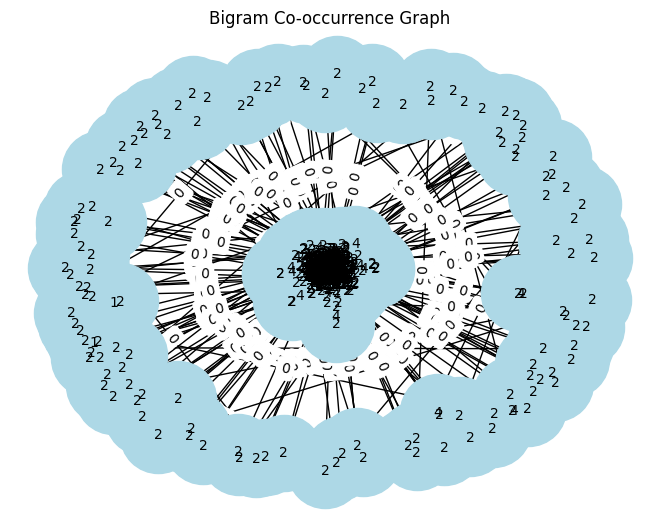

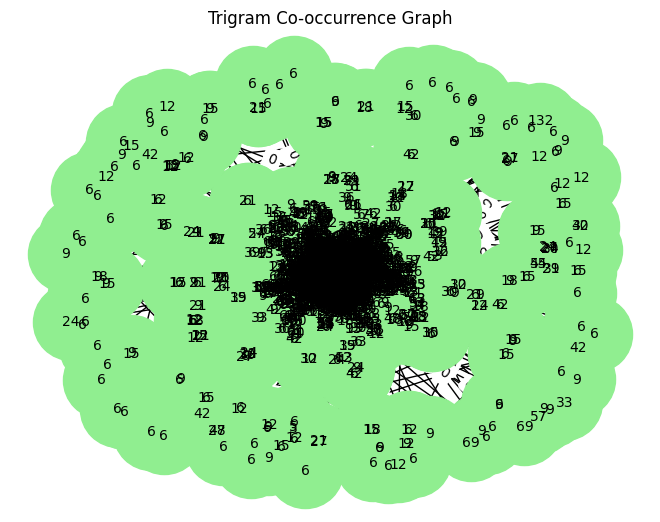

In [58]:
bigrams = extract_ngrams(words, 2)
trigrams = extract_ngrams(words, 3)

# Calculate frequencies
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Print frequencies
print("Bigram Frequencies:", bigram_freq)
print("Trigram Frequencies:", trigram_freq)

# Plot the word frequency graphs
plot_bigram_graph(bigram_freq)
plot_trigram_graph(trigram_freq)

In [61]:
# Function to load Bangla text from a file
def load_ai_written_text(file_path_2):
    with open('/content/ai_written.txt', 'r', encoding='utf-8') as file:
        return file.read()

# Path to the text file
file_path_2 = '/content/ai_written.txt'

# Load the text from the file and store it in the 'text' variable
ai_written_text = load_ai_written_text(file_path_2)

# Print the text to verify
print(ai_written_text)

গাঁয়ের মেঠোপথ ধরে হেঁটে আসছিল আসমা। মাথায় টেপা শাড়ি, পায়ে পুরনো স্যান্ডেল, কাঁধে ছোট্ট থলে, আর চোখে একরাশ চিন্তা। তার সংসার, তার জীবন—সবকিছু যেন ক্রমেই জটিল হয়ে উঠছে। আর্থিক অভাবের সঙ্গে মজনুর বদমেজাজ, খিটখিটে স্বভাব, সব মিলিয়ে আসমার দিন কাটানো কঠিন হয়ে পড়েছে। আসমার স্বামী মজনু দিনরাত মাঠে কাজ করে, তবুও সংসারের অভাব যেন শেষ হয় না। আর আসমা বাড়ির কাজ, হাঁস-মুরগি পালন, কখনো সেলাই কাজ—সবই করে। তবু কিছুতেই আর্থিক টানাপোড়েন মেটানো যাচ্ছে না। 

কয়েক মাস ধরে আসমা মজনুর পরিবর্তন লক্ষ্য করছে। আগে মজনু হাসিমুখে ঘরে ফিরত, কথা বলত, আর এখন যেন সবকিছুতেই বিরক্তি। কাজ থেকে ফিরে সে আর আগের মতো আসমার সঙ্গে কথা বলে না, কোনো কিছুতেই আগ্রহ দেখায় না। কখনো রেগে যায় ছোট্ট কোনো বিষয়ে, কখনো বা নীরবে বসে থাকে। আসমা প্রথমে ভেবেছিল, হয়তো কাজের চাপ। কিন্তু দিন দিন মজনুর এভাবে দূরে সরে যাওয়া আসমাকে ভাবনায় ফেলেছে। 

আজ সন্ধ্যাবেলা আসমা হাট থেকে ফিরল কিছু প্রয়োজনীয় বাজার নিয়ে। উঠানে দাঁড়ানো মজনুকে দেখে সে মন থেকে একবার ভালো করে ডাকতে চেয়েছিল, কিন্তু মজনুর মুখের দিকে তাকিয়েই সে থেমে গেল। মজনুর চোখে ক্লান্তির ছাপ। সেই প

In [66]:
def bangla_sentence_tokenize(ai_written_text):
    # Split sentences by full stop (।) used in Bangla
    sentences_ai = ai_written_text.split('।')
    sentences_ai = ai_written_text.split('\n\n')
    sentences_ai = ai_written_text.split('\n')
    return [sentence_ai.strip() for sentence_ai in sentences_ai if sentence_ai.strip()]

In [67]:
def bangla_word_tokenize(ai_written_text):
    # Split words by spaces
    words_ai = ai_written_text.split()
    return [word_ai.strip() for word_ai in words_ai if word_ai.strip()]

In [68]:
def preprocess_text(ai_written_text):
    # Remove punctuation (you might want to keep Bangla-specific punctuation like "।")
    translator_ai = str.maketrans('', '', string.punctuation)
    ai_written_text = ai_written_text.translate(translator_ai)

    # Tokenize sentences using the custom function
    sentences_ai = bangla_sentence_tokenize(ai_written_text)

    # Tokenize words using the custom function
    words_ai = bangla_word_tokenize(ai_written_text)

    return words_ai, sentences_ai

In [69]:
words_ai, sentences_ai = preprocess_text(ai_written_text)
print(words_ai)
print(sentences_ai)

['গাঁয়ের', 'মেঠোপথ', 'ধরে', 'হেঁটে', 'আসছিল', 'আসমা।', 'মাথায়', 'টেপা', 'শাড়ি', 'পায়ে', 'পুরনো', 'স্যান্ডেল', 'কাঁধে', 'ছোট্ট', 'থলে', 'আর', 'চোখে', 'একরাশ', 'চিন্তা।', 'তার', 'সংসার', 'তার', 'জীবন—সবকিছু', 'যেন', 'ক্রমেই', 'জটিল', 'হয়ে', 'উঠছে।', 'আর্থিক', 'অভাবের', 'সঙ্গে', 'মজনুর', 'বদমেজাজ', 'খিটখিটে', 'স্বভাব', 'সব', 'মিলিয়ে', 'আসমার', 'দিন', 'কাটানো', 'কঠিন', 'হয়ে', 'পড়েছে।', 'আসমার', 'স্বামী', 'মজনু', 'দিনরাত', 'মাঠে', 'কাজ', 'করে', 'তবুও', 'সংসারের', 'অভাব', 'যেন', 'শেষ', 'হয়', 'না।', 'আর', 'আসমা', 'বাড়ির', 'কাজ', 'হাঁসমুরগি', 'পালন', 'কখনো', 'সেলাই', 'কাজ—সবই', 'করে।', 'তবু', 'কিছুতেই', 'আর্থিক', 'টানাপোড়েন', 'মেটানো', 'যাচ্ছে', 'না।', 'কয়েক', 'মাস', 'ধরে', 'আসমা', 'মজনুর', 'পরিবর্তন', 'লক্ষ্য', 'করছে।', 'আগে', 'মজনু', 'হাসিমুখে', 'ঘরে', 'ফিরত', 'কথা', 'বলত', 'আর', 'এখন', 'যেন', 'সবকিছুতেই', 'বিরক্তি।', 'কাজ', 'থেকে', 'ফিরে', 'সে', 'আর', 'আগের', 'মতো', 'আসমার', 'সঙ্গে', 'কথা', 'বলে', 'না', 'কোনো', 'কিছুতেই', 'আগ্রহ', 'দেখায়', 'না।', 'কখনো', 'রেগে', 'যায়', 'ছোট্ট', 'কোনো', 'বিষ

In [75]:
def word_frequency_ai(words_ai):
    return Counter(words_ai)
print(words_ai)

['গাঁয়ের', 'মেঠোপথ', 'ধরে', 'হেঁটে', 'আসছিল', 'আসমা।', 'মাথায়', 'টেপা', 'শাড়ি', 'পায়ে', 'পুরনো', 'স্যান্ডেল', 'কাঁধে', 'ছোট্ট', 'থলে', 'আর', 'চোখে', 'একরাশ', 'চিন্তা।', 'তার', 'সংসার', 'তার', 'জীবন—সবকিছু', 'যেন', 'ক্রমেই', 'জটিল', 'হয়ে', 'উঠছে।', 'আর্থিক', 'অভাবের', 'সঙ্গে', 'মজনুর', 'বদমেজাজ', 'খিটখিটে', 'স্বভাব', 'সব', 'মিলিয়ে', 'আসমার', 'দিন', 'কাটানো', 'কঠিন', 'হয়ে', 'পড়েছে।', 'আসমার', 'স্বামী', 'মজনু', 'দিনরাত', 'মাঠে', 'কাজ', 'করে', 'তবুও', 'সংসারের', 'অভাব', 'যেন', 'শেষ', 'হয়', 'না।', 'আর', 'আসমা', 'বাড়ির', 'কাজ', 'হাঁসমুরগি', 'পালন', 'কখনো', 'সেলাই', 'কাজ—সবই', 'করে।', 'তবু', 'কিছুতেই', 'আর্থিক', 'টানাপোড়েন', 'মেটানো', 'যাচ্ছে', 'না।', 'কয়েক', 'মাস', 'ধরে', 'আসমা', 'মজনুর', 'পরিবর্তন', 'লক্ষ্য', 'করছে।', 'আগে', 'মজনু', 'হাসিমুখে', 'ঘরে', 'ফিরত', 'কথা', 'বলত', 'আর', 'এখন', 'যেন', 'সবকিছুতেই', 'বিরক্তি।', 'কাজ', 'থেকে', 'ফিরে', 'সে', 'আর', 'আগের', 'মতো', 'আসমার', 'সঙ্গে', 'কথা', 'বলে', 'না', 'কোনো', 'কিছুতেই', 'আগ্রহ', 'দেখায়', 'না।', 'কখনো', 'রেগে', 'যায়', 'ছোট্ট', 'কোনো', 'বিষ

In [76]:
def plot_word_frequency(word_frequency_ai):
    words_ai, counts_ai = zip(*word_frequency_ai.most_common(20))  # Get top 10 words
    plt.bar(words_ai, counts_ai)
    plt.title('Top 20 Most Frequent Words')
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.xlabel('Words')
    plt.show()

In [77]:
word_frequency_ai = word_frequency_ai(words_ai)

গাঁয়ের: 1
মেঠোপথ: 1
ধরে: 5
হেঁটে: 1
আসছিল: 1
আসমা।: 1
মাথায়: 1
টেপা: 1
শাড়ি: 1
পায়ে: 1
পুরনো: 1
স্যান্ডেল: 1
কাঁধে: 1
ছোট্ট: 3
থলে: 1
আর: 13
চোখে: 3
একরাশ: 1
চিন্তা।: 1
তার: 10
সংসার: 4
জীবন—সবকিছু: 1
যেন: 9
ক্রমেই: 1
জটিল: 1
হয়ে: 8
উঠছে।: 1
আর্থিক: 2
অভাবের: 1
সঙ্গে: 3
মজনুর: 17
বদমেজাজ: 1
খিটখিটে: 1
স্বভাব: 1
সব: 5
মিলিয়ে: 1
আসমার: 7
দিন: 6
কাটানো: 1
কঠিন: 2
পড়েছে।: 1
স্বামী: 1
মজনু: 14
দিনরাত: 1
মাঠে: 2
কাজ: 5
করে: 6
তবুও: 1
সংসারের: 2
অভাব: 2
শেষ: 1
হয়: 3
না।: 8
আসমা: 15
বাড়ির: 2
হাঁসমুরগি: 1
পালন: 1
কখনো: 4
সেলাই: 1
কাজ—সবই: 1
করে।: 1
তবু: 2
কিছুতেই: 2
টানাপোড়েন: 3
মেটানো: 1
যাচ্ছে: 2
কয়েক: 1
মাস: 1
পরিবর্তন: 1
লক্ষ্য: 1
করছে।: 1
আগে: 2
হাসিমুখে: 1
ঘরে: 2
ফিরত: 1
কথা: 7
বলত: 1
এখন: 2
সবকিছুতেই: 1
বিরক্তি।: 1
থেকে: 3
ফিরে: 1
সে: 13
আগের: 2
মতো: 2
বলে: 2
না: 8
কোনো: 5
আগ্রহ: 1
দেখায়: 1
রেগে: 1
যায়: 2
বিষয়ে: 1
বা: 2
নীরবে: 1
বসে: 2
থাকে।: 1
প্রথমে: 2
ভেবেছিল: 2
হয়তো: 1
কাজের: 3
চাপ।: 1
কিন্তু: 9
এভাবে: 2
দূরে: 1
সরে: 1
যাওয়া: 1
আসমাকে: 1
ভাবনায়: 1
ফেলেছে।: 1
আজ: 7
সন্ধ্যাবেলা: 1
হাট:

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2478 (\N{BENGALI LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2460 (\N{BENGALI LETTER JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2497 (\N{BENGALI VOWEL SIGN U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylab

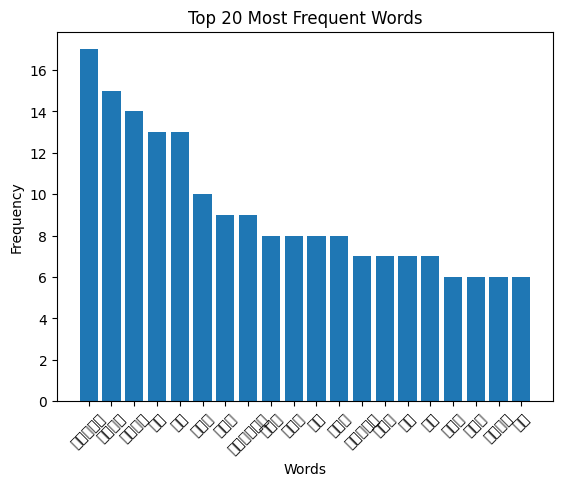

In [78]:
for word_ai, count_ai in word_frequency_ai.items():
    print(f"{word_ai}: {count_ai}")

# Plot the word frequency
plot_word_frequency(word_frequency_ai)

In [79]:
print(words_ai)

['গাঁয়ের', 'মেঠোপথ', 'ধরে', 'হেঁটে', 'আসছিল', 'আসমা।', 'মাথায়', 'টেপা', 'শাড়ি', 'পায়ে', 'পুরনো', 'স্যান্ডেল', 'কাঁধে', 'ছোট্ট', 'থলে', 'আর', 'চোখে', 'একরাশ', 'চিন্তা।', 'তার', 'সংসার', 'তার', 'জীবন—সবকিছু', 'যেন', 'ক্রমেই', 'জটিল', 'হয়ে', 'উঠছে।', 'আর্থিক', 'অভাবের', 'সঙ্গে', 'মজনুর', 'বদমেজাজ', 'খিটখিটে', 'স্বভাব', 'সব', 'মিলিয়ে', 'আসমার', 'দিন', 'কাটানো', 'কঠিন', 'হয়ে', 'পড়েছে।', 'আসমার', 'স্বামী', 'মজনু', 'দিনরাত', 'মাঠে', 'কাজ', 'করে', 'তবুও', 'সংসারের', 'অভাব', 'যেন', 'শেষ', 'হয়', 'না।', 'আর', 'আসমা', 'বাড়ির', 'কাজ', 'হাঁসমুরগি', 'পালন', 'কখনো', 'সেলাই', 'কাজ—সবই', 'করে।', 'তবু', 'কিছুতেই', 'আর্থিক', 'টানাপোড়েন', 'মেটানো', 'যাচ্ছে', 'না।', 'কয়েক', 'মাস', 'ধরে', 'আসমা', 'মজনুর', 'পরিবর্তন', 'লক্ষ্য', 'করছে।', 'আগে', 'মজনু', 'হাসিমুখে', 'ঘরে', 'ফিরত', 'কথা', 'বলত', 'আর', 'এখন', 'যেন', 'সবকিছুতেই', 'বিরক্তি।', 'কাজ', 'থেকে', 'ফিরে', 'সে', 'আর', 'আগের', 'মতো', 'আসমার', 'সঙ্গে', 'কথা', 'বলে', 'না', 'কোনো', 'কিছুতেই', 'আগ্রহ', 'দেখায়', 'না।', 'কখনো', 'রেগে', 'যায়', 'ছোট্ট', 'কোনো', 'বিষ

In [80]:
def extract_ngrams(words_ai, n):
    return zip(*[words_ai[i:] for i in range(n)])

In [81]:
def plot_bigram_graph(bigram_freq):
    G = nx.Graph()

    # Calculate individual word frequencies from bigram frequencies
    word_freq = Counter()
    for (word1, word2), freq in bigram_freq.items():
        word_freq[word1] += freq
        word_freq[word2] += freq

    # Add bigrams as nodes and edges based on individual word frequencies
    for (word1, word2), freq in bigram_freq.items():
        G.add_node(word1, frequency=word_freq[word1])
        G.add_node(word2, frequency=word_freq[word2])

        # Edge weight as the difference between the larger and smaller frequency
        edge_weight = abs(word_freq[word1] - word_freq[word2])
        G.add_edge(word1, word2, weight=edge_weight)

    # Draw the graph
    pos = nx.spring_layout(G)
    node_labels = {node: G.nodes[node]['frequency'] for node in G.nodes()}
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=3000, node_color='lightblue', font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Bigram Co-occurrence Graph")
    plt.show()

In [82]:
def plot_trigram_graph(trigram_freq):
    G = nx.Graph()

    # Calculate individual word frequencies from trigram frequencies
    word_freq = Counter()
    for (word1, word2, word3), freq in trigram_freq.items():
        word_freq[word1] += freq
        word_freq[word2] += freq
        word_freq[word3] += freq

    # Add trigrams as nodes and edges based on individual word frequencies
    for (word1, word2, word3), freq in trigram_freq.items():
        G.add_node(f"{word1} {word2}", frequency=word_freq[word1] + word_freq[word2])
        G.add_node(f"{word2} {word3}", frequency=word_freq[word2] + word_freq[word3])

        # Edge weight as the difference between the larger and smaller frequency
        edge_weight = abs((word_freq[word1] + word_freq[word2]) - (word_freq[word2] + word_freq[word3]))
        G.add_edge(f"{word1} {word2}", f"{word2} {word3}", weight=edge_weight)

    # Draw the graph
    pos = nx.spring_layout(G)
    node_labels = {node: G.nodes[node]['frequency'] for node in G.nodes()}
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=3000, node_color='lightgreen', font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Trigram Co-occurrence Graph")
    plt.show()

Bigram Frequencies: Counter({('আর', 'আসমা'): 3, ('দিকে', 'তাকিয়ে'): 3, ('তাকিয়ে', 'বলল'): 3, ('বলল', '“তুমি'): 3, ('কিন্তু', 'আজ'): 3, ('কঠিন', 'হয়ে'): 2, ('হয়', 'না।'): 2, ('আসমা', 'বাড়ির'): 2, ('বাড়ির', 'কাজ'): 2, ('দিন', 'দিন'): 2, ('কিন্তু', 'মজনুর'): 2, ('কথা', 'বলতে'): 2, ('ভারী', 'হয়ে'): 2, ('সে', 'কিছু'): 2, ('রান্না', 'করতে'): 2, ('মনে', 'পড়ে'): 2, ('পড়ে', 'গেল'): 2, ('আজ', 'মজনুর'): 2, ('মজনুর', 'বাবার'): 2, ('বাবার', 'মৃত্যুদিন।'): 2, ('মজনুর', 'ভেতরে'): 2, ('জমে', 'থাকা'): 2, ('এই', 'কষ্ট'): 2, ('কখনোই', 'বিষয়টি'): 2, ('বিষয়টি', 'নিয়ে'): 2, ('আসমাও', 'তার'): 2, ('তার', 'ভেতরে'): 2, ('এক', 'ধরনের'): 2, ('কিছু', 'বলল'): 2, ('উঠল।', 'মজনু'): 2, ('কি', 'কম'): 2, ('সে', 'মজনুর'): 2, ('মজনুর', 'দিকে'): 2, ('এতদিন', 'ধরে'): 2, ('মুছে', 'যাচ্ছে।'): 2, ('ধীরে', 'ধীরে'): 2, ('ঠিক', 'হয়ে'): 2, ('হয়ে', 'যাবে।'): 2, ('একে', 'অপরকে'): 2, ('তাহলে', 'কোনো'): 2, ('ভালোবাসা', 'আর'): 2, ('শুরু', 'করল।'): 2, ('গাঁয়ের', 'মেঠোপথ'): 1, ('মেঠোপথ', 'ধরে'): 1, ('ধরে', 'হেঁটে'): 1, ('হেঁটে', 'আসছিল')

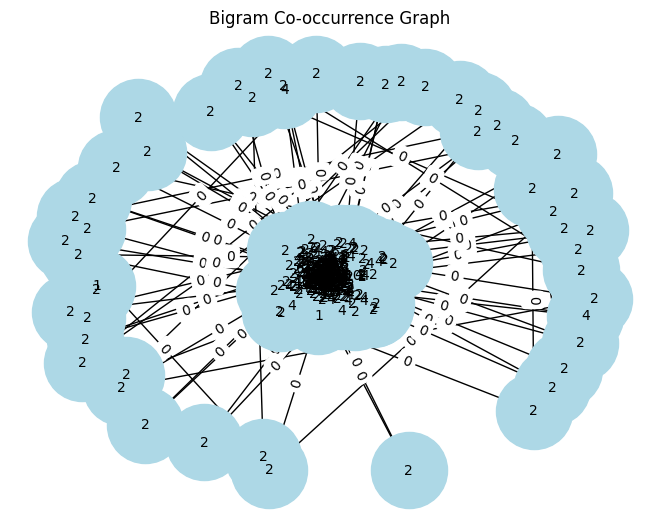

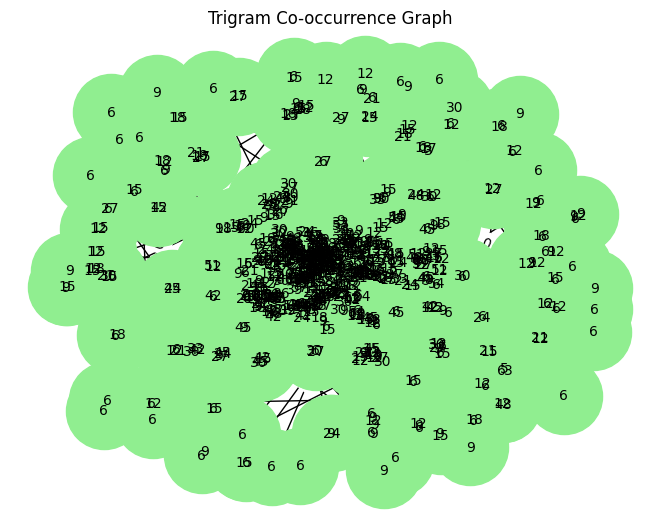

In [83]:
bigrams = extract_ngrams(words_ai, 2)
trigrams = extract_ngrams(words_ai, 3)

# Calculate frequencies
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Print frequencies
print("Bigram Frequencies:", bigram_freq)
print("Trigram Frequencies:", trigram_freq)

# Plot the word frequency graphs
plot_bigram_graph(bigram_freq)
plot_trigram_graph(trigram_freq)

In [100]:
def plot_ngram_graph(ngram_freq, n):
    G = nx.Graph()

    # Calculate individual word frequencies from n-gram frequencies
    word_freq = Counter()
    for ngram, freq in ngram_freq.items():
        for word in ngram:
            word_freq[word] += freq

    # Add n-grams as nodes and edges based on individual word frequencies
    for ngram, freq in ngram_freq.items():
        node_label = " ".join(ngram)
        G.add_node(node_label, frequency=sum(word_freq[word] for word in ngram))

        # Create edges between the words in the n-gram
        for i in range(len(ngram) - 1):
            # Ensure bigram nodes exist and have the 'frequency' attribute
            bigram_label = " ".join(ngram[i:i+2])
            if not G.has_node(bigram_label):
                G.add_node(bigram_label, frequency=sum(word_freq[word] for word in ngram[i:i+2]))

            edge_weight = abs(word_freq[ngram[i]] - word_freq[ngram[i + 1]])
            G.add_edge(node_label, bigram_label, weight=edge_weight)

    # Draw the graph
    pos = nx.spring_layout(G)
    node_labels = {node: G.nodes[node]['frequency'] for node in G.nodes()}

    # Draw nodes
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=100, node_color='lightblue', font_size=6)

    # Draw edges
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title(f"{n}-Gram Co-occurrence Graph")
    plt.show()

In [101]:
def plot_tetragram_graph(tetragram_freq):
    plot_ngram_graph(tetragram_freq, 4)

# Function to plot the pentagram graph
def plot_pentagram_graph(pentagram_freq):
    plot_ngram_graph(pentagram_freq, 5)

# Function to plot the hexagram graph
def plot_hexagram_graph(hexagram_freq):
    plot_ngram_graph(hexagram_freq, 6)

Tetragram Frequencies: Counter({('খাবে', 'না', 'মোবারক', 'হোসেন'): 2, ('হয়', 'নি।', 'মোবারক', 'হোসেন'): 2, ('মাফলার', 'দিয়ে', 'কান', 'ঢাকতে'): 2, ('কিছু', 'না', 'বুঝেই', 'মোবারক'): 2, ('না', 'বুঝেই', 'মোবারক', 'হোসেন'): 2, ('দিয়ে', 'কৈ', 'মাছের', 'ঝোল'): 2, ('ঘোবারক', 'ভাঙন', 'গাণ্ি', 'খে'): 1, ('ভাঙন', 'গাণ্ি', 'খে', 'ঝা'): 1, ('গাণ্ি', 'খে', 'ঝা', 'মোবারক'): 1, ('খে', 'ঝা', 'মোবারক', 'হোসেন'): 1, ('ঝা', 'মোবারক', 'হোসেন', 'ভাত'): 1, ('মোবারক', 'হোসেন', 'ভাত', 'খেতে'): 1, ('হোসেন', 'ভাত', 'খেতে', 'বসে'): 1, ('ভাত', 'খেতে', 'বসে', 'তরকারির'): 1, ('খেতে', 'বসে', 'তরকারির', 'বাটির'): 1, ('বসে', 'তরকারির', 'বাটির', 'দিকে'): 1, ('তরকারির', 'বাটির', 'দিকে', 'তাকিয়ে'): 1, ('বাটির', 'দিকে', 'তাকিয়ে', 'বললেন'): 1, ('দিকে', 'তাকিয়ে', 'বললেন', 'এটা'): 1, ('তাকিয়ে', 'বললেন', 'এটা', 'কী'): 1, ('বললেন', 'এটা', 'কী', 'তাঁর'): 1, ('এটা', 'কী', 'তাঁর', 'গলার'): 1, ('কী', 'তাঁর', 'গলার', 'স্বরে'): 1, ('তাঁর', 'গলার', 'স্বরে', 'অদূরবর্তী'): 1, ('গলার', 'স্বরে', 'অদূরবর্তী', 'ঝড়ের'): 1, ('স্বরে',

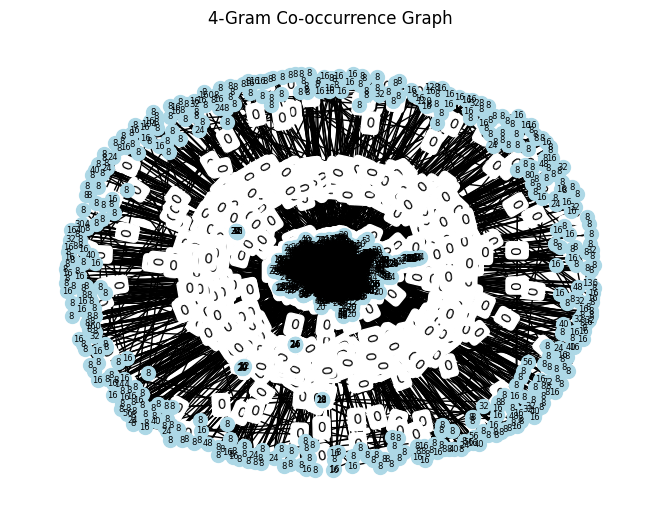

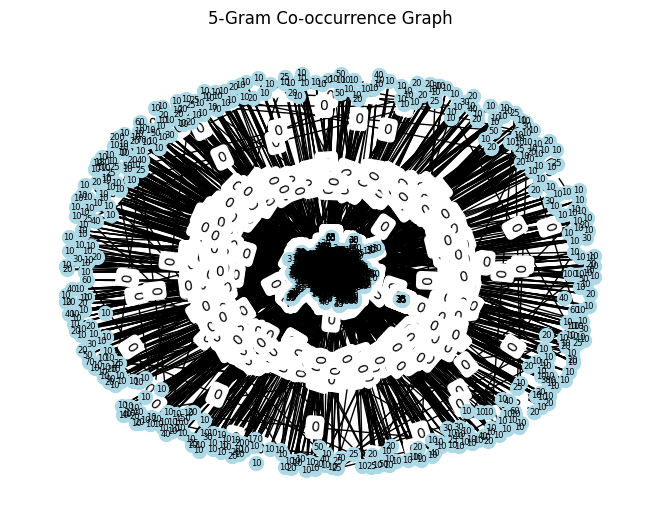

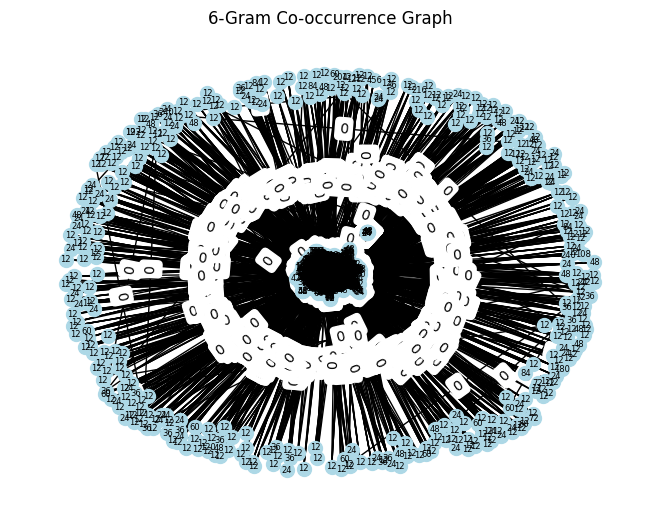

In [102]:
tetragrams = extract_ngrams(words, 4)
pentagrams = extract_ngrams(words, 5)
hexagrams = extract_ngrams(words, 6)

# Calculate frequencies
tetragram_freq = Counter(tetragrams)
pentagram_freq = Counter(pentagrams)
hexagram_freq = Counter(hexagrams)

# Print frequencies
print("Tetragram Frequencies:", tetragram_freq)
print("Pentagram Frequencies:", pentagram_freq)
print("Hexagram Frequencies:", hexagram_freq)

# Plot the word frequency graphs
plot_tetragram_graph(tetragram_freq)
plot_pentagram_graph(pentagram_freq)
plot_hexagram_graph(hexagram_freq)

Tetragram Frequencies: Counter({('দিকে', 'তাকিয়ে', 'বলল', '“তুমি'): 3, ('আর', 'আসমা', 'বাড়ির', 'কাজ'): 2, ('সে', 'মজনুর', 'দিকে', 'তাকিয়ে'): 2, ('মজনুর', 'দিকে', 'তাকিয়ে', 'বলল'): 2, ('গাঁয়ের', 'মেঠোপথ', 'ধরে', 'হেঁটে'): 1, ('মেঠোপথ', 'ধরে', 'হেঁটে', 'আসছিল'): 1, ('ধরে', 'হেঁটে', 'আসছিল', 'আসমা।'): 1, ('হেঁটে', 'আসছিল', 'আসমা।', 'মাথায়'): 1, ('আসছিল', 'আসমা।', 'মাথায়', 'টেপা'): 1, ('আসমা।', 'মাথায়', 'টেপা', 'শাড়ি'): 1, ('মাথায়', 'টেপা', 'শাড়ি', 'পায়ে'): 1, ('টেপা', 'শাড়ি', 'পায়ে', 'পুরনো'): 1, ('শাড়ি', 'পায়ে', 'পুরনো', 'স্যান্ডেল'): 1, ('পায়ে', 'পুরনো', 'স্যান্ডেল', 'কাঁধে'): 1, ('পুরনো', 'স্যান্ডেল', 'কাঁধে', 'ছোট্ট'): 1, ('স্যান্ডেল', 'কাঁধে', 'ছোট্ট', 'থলে'): 1, ('কাঁধে', 'ছোট্ট', 'থলে', 'আর'): 1, ('ছোট্ট', 'থলে', 'আর', 'চোখে'): 1, ('থলে', 'আর', 'চোখে', 'একরাশ'): 1, ('আর', 'চোখে', 'একরাশ', 'চিন্তা।'): 1, ('চোখে', 'একরাশ', 'চিন্তা।', 'তার'): 1, ('একরাশ', 'চিন্তা।', 'তার', 'সংসার'): 1, ('চিন্তা।', 'তার', 'সংসার', 'তার'): 1, ('তার', 'সংসার', 'তার', 'জীবন—সবকিছু'): 1, ('সংসার', 'তার', '

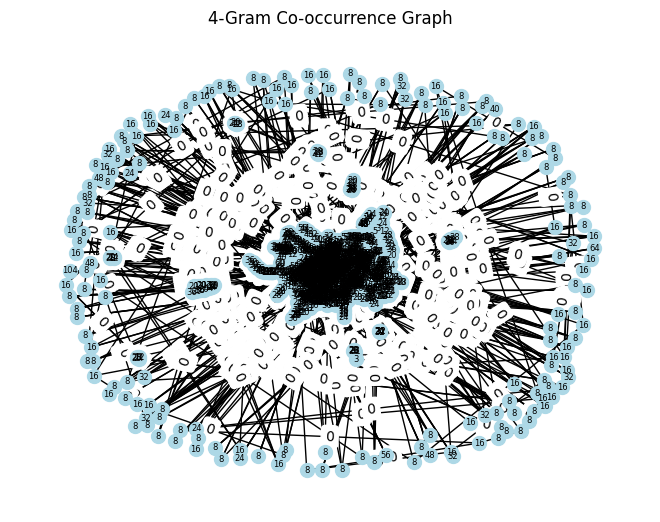

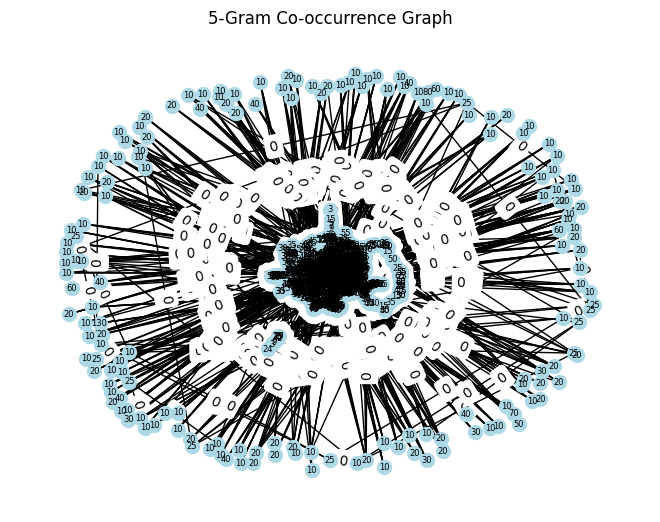

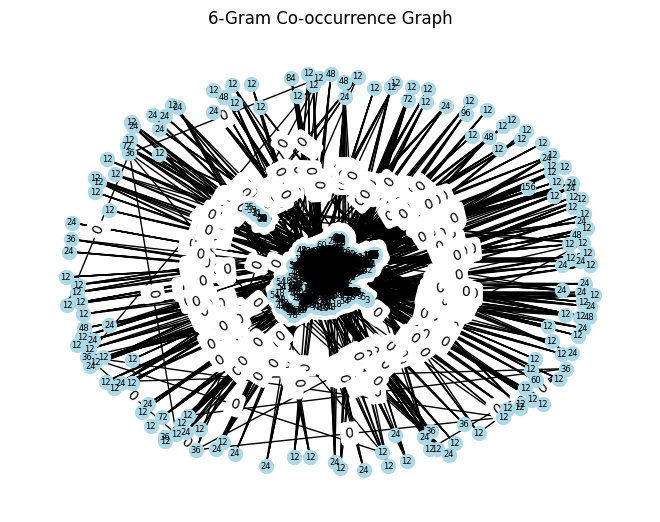

In [103]:
tetragrams = extract_ngrams(words_ai, 4)
pentagrams = extract_ngrams(words_ai, 5)
hexagrams = extract_ngrams(words_ai, 6)

# Calculate frequencies
tetragram_freq = Counter(tetragrams)
pentagram_freq = Counter(pentagrams)
hexagram_freq = Counter(hexagrams)

# Print frequencies
print("Tetragram Frequencies:", tetragram_freq)
print("Pentagram Frequencies:", pentagram_freq)
print("Hexagram Frequencies:", hexagram_freq)

# Plot the word frequency graphs
plot_tetragram_graph(tetragram_freq)
plot_pentagram_graph(pentagram_freq)
plot_hexagram_graph(hexagram_freq)

In [110]:
from nltk import trigrams, word_tokenize

# Assuming human_written_text is meant to be a string containing the text
text = human_written_text
tokens = word_tokenize(text)

# Generate trigrams
trigrams_list = list(trigrams(tokens))

# Count occurrences
trigram_counts = Counter(trigrams_list)
bigram_counts = Counter((w1, w2) for (w1, w2, w3) in trigrams_list)

In [118]:
from collections import Counter, defaultdict

trigram_probs = defaultdict(lambda: defaultdict(float))

# Use 'trigram_freq' instead of 'trigram_counts'
for (w1, w2, w3), count in trigram_freq.items():
    if bigram_counts[(w1, w2)] != 0: # Check to ensure the bigram count is not zero.
        trigram_probs[(w1, w2)][w3] = count / bigram_counts[(w1, w2)]



In [119]:
import numpy as np # Import the NumPy library and assign it to the alias 'np'

def calculate_perplexity(trigram_probs, tokens):
    N = len(tokens)
    log_prob_sum = 0.0
    for i in range(2, N):  # Start from 2 for trigram
        w1, w2, w3 = tokens[i - 2], tokens[i - 1], tokens[i]
        prob = trigram_probs[(w1, w2)].get(w3, 1e-10)  # Smoothing for unseen trigrams
        log_prob_sum += np.log(prob)
    perplexity = np.exp(-log_prob_sum / (N - 2))  # N - 2 for trigrams
    return perplexity

# Calculate perplexity
perplexity = calculate_perplexity(trigram_probs, tokens)
print(f'Perplexity: {perplexity}')

Perplexity: 610.1771323152151


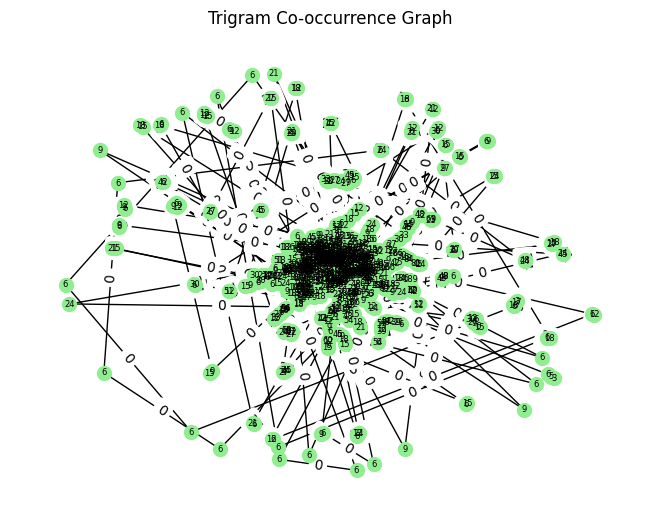

In [120]:
def plot_trigram_graph(trigram_freq):
    G = nx.Graph()

    # Calculate individual word frequencies from trigram frequencies
    word_freq = Counter()
    for (word1, word2, word3), freq in trigram_freq.items():
        word_freq[word1] += freq
        word_freq[word2] += freq
        word_freq[word3] += freq

    # Add trigrams as nodes and edges based on individual word frequencies
    for (word1, word2, word3), freq in trigram_freq.items():
        G.add_node(f"{word1} {word2}", frequency=word_freq[word1] + word_freq[word2])
        G.add_node(f"{word2} {word3}", frequency=word_freq[word2] + word_freq[word3])

        # Edge weight as the difference between the larger and smaller frequency
        edge_weight = abs((word_freq[word1] + word_freq[word2]) - (word_freq[word2] + word_freq[word3]))
        G.add_edge(f"{word1} {word2}", f"{word2} {word3}", weight=edge_weight)

    # Draw the graph
    pos = nx.spring_layout(G)
    node_labels = {node: G.nodes[node]['frequency'] for node in G.nodes()}
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=100, node_color='lightgreen', font_size=6)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Trigram Co-occurrence Graph")
    plt.show()

# Plot the trigram graph
plot_trigram_graph(trigram_counts)

In [124]:
from nltk import trigrams, word_tokenize

# Assuming human_written_text is meant to be a string containing the text
text = ai_written_text
tokens = word_tokenize(text)

# Generate trigrams
trigrams_list = list(trigrams(tokens))

# Count occurrences
trigram_counts = Counter(trigrams_list)
bigram_counts = Counter((w1, w2) for (w1, w2, w3) in trigrams_list)

In [126]:
from collections import Counter, defaultdict

trigram_probs = defaultdict(lambda: defaultdict(float))

# Use 'trigram_freq' instead of 'trigram_counts'
for (w1, w2, w3), count in trigram_freq.items():
    if bigram_counts[(w1, w2)] != 0: # Check to ensure the bigram count is not zero.
        trigram_probs[(w1, w2)][w3] = count / bigram_counts[(w1, w2)]

In [123]:
import numpy as np # Import the NumPy library and assign it to the alias 'np'

def calculate_perplexity(trigram_probs, tokens):
    N = len(tokens)
    log_prob_sum = 0.0
    for i in range(2, N):  # Start from 2 for trigram
        w1, w2, w3 = tokens[i - 2], tokens[i - 1], tokens[i]
        prob = trigram_probs[(w1, w2)].get(w3, 1e-10)  # Smoothing for unseen trigrams
        log_prob_sum += np.log(prob)
    perplexity = np.exp(-log_prob_sum / (N - 2))  # N - 2 for trigrams
    return perplexity

# Calculate perplexity
perplexity = calculate_perplexity(trigram_probs, tokens)
print(f'Perplexity: {perplexity}')

Perplexity: 610.1771323152151


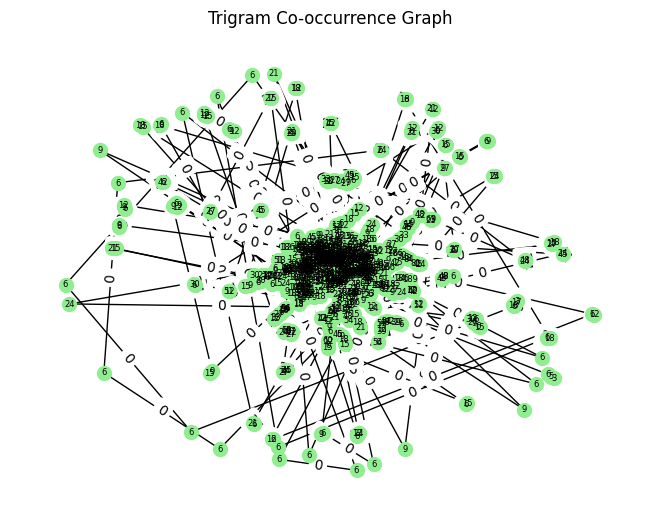

In [ ]:
def plot_trigram_graph(trigram_freq):
    G = nx.Graph()

    # Calculate individual word frequencies from trigram frequencies
    word_freq = Counter()
    for (word1, word2, word3), freq in trigram_freq.items():
        word_freq[word1] += freq
        word_freq[word2] += freq
        word_freq[word3] += freq

    # Add trigrams as nodes and edges based on individual word frequencies
    for (word1, word2, word3), freq in trigram_freq.items():
        G.add_node(f"{word1} {word2}", frequency=word_freq[word1] + word_freq[word2])
        G.add_node(f"{word2} {word3}", frequency=word_freq[word2] + word_freq[word3])

        # Edge weight as the difference between the larger and smaller frequency
        edge_weight = abs((word_freq[word1] + word_freq[word2]) - (word_freq[word2] + word_freq[word3]))
        G.add_edge(f"{word1} {word2}", f"{word2} {word3}", weight=edge_weight)

    # Draw the graph
    pos = nx.spring_layout(G)
    node_labels = {node: G.nodes[node]['frequency'] for node in G.nodes()}
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=100, node_color='lightgreen', font_size=6)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Trigram Co-occurrence Graph")
    plt.show()

# Plot the trigram graph
plot_trigram_graph(trigram_counts)